Detected 25 circles.


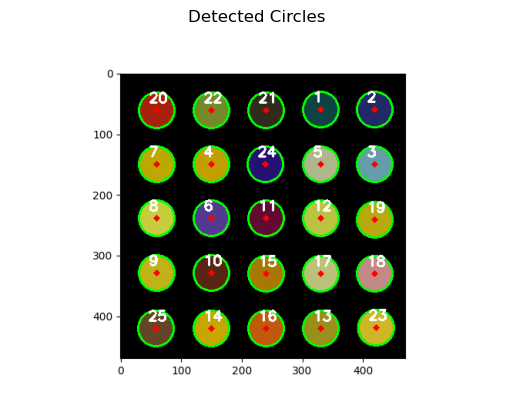

Dot 1: R=13.97, G=65.91, B=66.91
Dot 2: R=31.92, G=41.90, B=102.77
Dot 3: R=100.79, G=157.67, B=167.65
Dot 4: R=192.91, G=158.92, B=0.00
Dot 5: R=175.80, G=181.80, B=139.84
Dot 6: R=83.58, G=56.72, B=144.29
Dot 7: R=188.89, G=166.90, B=0.98
Dot 8: R=196.01, G=203.97, B=61.67
Dot 9: R=192.37, G=177.41, B=24.90
Dot 10: R=86.72, G=36.87, B=16.93
Dot 11: R=98.48, G=9.93, B=50.72
Dot 12: R=184.89, G=193.84, B=65.60
Dot 13: R=153.59, G=142.62, B=26.92
Dot 14: R=199.65, G=165.71, B=1.98
Dot 15: R=168.77, G=118.83, B=4.98
Dot 16: R=191.61, G=88.81, B=10.97
Dot 17: R=186.64, G=192.63, B=120.76
Dot 18: R=195.41, G=136.58, B=134.59
Dot 19: R=182.43, G=166.65, B=13.78
Dot 20: R=165.04, G=31.80, B=10.92
Dot 21: R=47.70, G=43.72, B=27.82
Dot 22: R=117.33, G=136.23, B=39.76
Dot 23: R=202.73, G=178.24, B=38.18
Dot 24: R=36.81, G=16.90, B=115.43
Dot 25: R=98.75, G=68.13, B=36.53


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "10ppm.png"  
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale (required for HoughCircles)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying a blur to reduce noise and improve circle detection
gray_blurred = cv2.medianBlur(gray, 5)

# Detecting circles using Hough Circle Transform
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,  # Inverse ratio of resolution
    minDist=50,  # Minimum distance between circle centers
    param1=50,  # Upper threshold for the Canny edge detector
    param2=30,  # Threshold for center detection
    minRadius=20,  # Minimum circle radius
    maxRadius=24   # Maximum circle radius
)

# Ensuring some circles were detected
if circles is not None:
    circles = np.uint16(np.around(circles))  # Round and convert to integer
    print(f"Detected {len(circles[0])} circles.")
    
    # Displaying the detected circles on the image
    output_image = image_rgb.copy()
    for i, circle in enumerate(circles[0, :]):
        x, y, r = circle
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)  # Draw the circle
        cv2.circle(output_image, (x, y), 2, (255, 0, 0), 3)  # Draw the center

        cv2.putText(
        output_image,
        str(i + 1), # Circle number
        (x - 10, y - 10), # Position slightly above the center
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6, # Font size
        (255, 255, 255), # Text color (white)
        2 # Thickness
        )
    plt.imshow(output_image)
    plt.title("Detected Circles")
    plt.axis("off")
    plt.show()
    
    # Extract RGB values for each detected circle
    rgb_values = []
    for circle in circles[0, :]:
        x, y, r = circle
        # Mask to extract only the circular region
        mask = np.zeros(image_rgb.shape[:2], dtype=np.uint8)
        cv2.circle(mask, (x, y), r, 255, -1)
        # Get the mean RGB value in the circular region
        mean_color = cv2.mean(image_rgb, mask=mask)[:3]
        rgb_values.append(mean_color)
    
    # Displaying the RGB values
    for i, rgb in enumerate(rgb_values):
        print(f"Dot {i+1}: R={rgb[0]:.2f}, G={rgb[1]:.2f}, B={rgb[2]:.2f}")
else:
    print("No circles were detected.")

Detected 25 circles.


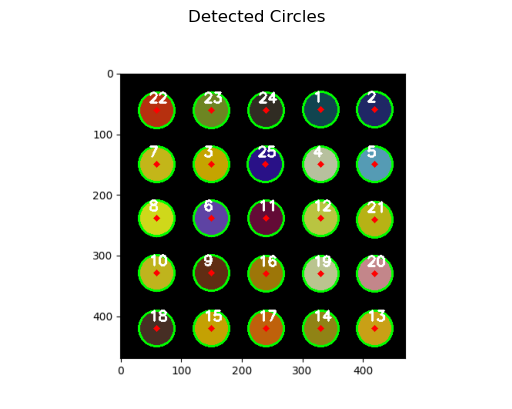

Dot 1: R=16.97, G=67.91, B=78.90
Dot 2: R=30.92, G=38.90, B=100.77
Dot 3: R=196.91, G=163.92, B=0.00
Dot 4: R=182.79, G=191.79, B=157.82
Dot 5: R=84.82, G=154.68, B=179.63
Dot 6: R=93.54, G=66.67, B=162.21
Dot 7: R=194.89, G=181.89, B=24.97
Dot 8: R=205.97, G=214.92, B=25.85
Dot 9: R=95.70, G=44.85, B=18.92
Dot 10: R=190.37, G=179.41, B=28.89
Dot 11: R=98.48, G=10.93, B=53.71
Dot 12: R=183.90, G=194.83, B=64.60
Dot 13: R=200.22, G=159.38, B=21.91
Dot 14: R=143.61, G=130.65, B=20.93
Dot 15: R=195.65, G=160.71, B=2.98
Dot 16: R=156.78, G=117.83, B=7.98
Dot 17: R=190.61, G=96.80, B=10.97
Dot 18: R=69.86, G=45.90, B=35.92
Dot 19: R=185.65, G=195.63, B=142.73
Dot 20: R=194.41, G=133.59, B=137.58
Dot 21: R=180.45, G=175.53, B=20.69
Dot 22: R=180.95, G=47.71, B=14.89
Dot 23: R=108.39, G=132.26, B=33.79
Dot 24: R=47.70, G=43.72, B=34.77
Dot 25: R=40.79, G=16.90, B=134.34


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "initial.png"  
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale (required for HoughCircles)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a blur to reduce noise and improve circle detection
gray_blurred = cv2.medianBlur(gray, 5)

# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,  # Inverse ratio of resolution
    minDist=50,  # Minimum distance between circle centers
    param1=50,  # Upper threshold for the Canny edge detector
    param2=30,  # Threshold for center detection
    minRadius=20,  # Minimum circle radius
    maxRadius=24   # Maximum circle radius
)

# Ensure some circles were detected
if circles is not None:
    circles = np.uint16(np.around(circles))  # Round and convert to integer
    print(f"Detected {len(circles[0])} circles.")
    
    # Display the detected circles on the image
    output_image = image_rgb.copy()
    for i, circle in enumerate(circles[0, :]):
        x, y, r = circle
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)  # Draw the circle
        cv2.circle(output_image, (x, y), 2, (255, 0, 0), 3)  # Draw the center
        
        cv2.putText(
        output_image,
        str(i + 1), # Circle number
        (x - 10, y - 10), # Position slightly above the center
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6, # Font size
        (255, 255, 255), # Text color (white)
        2 # Thickness
        )
    
    plt.imshow(output_image)
    plt.title("Detected Circles")
    plt.axis("off")
    plt.show()
    
    # Extract RGB values for each detected circle
    rgb_values = []
    for circle in circles[0, :]:
        x, y, r = circle
        # Mask to extract only the circular region
        mask = np.zeros(image_rgb.shape[:2], dtype=np.uint8)
        cv2.circle(mask, (x, y), r, 255, -1)
        # Get the mean RGB value in the circular region
        mean_color = cv2.mean(image_rgb, mask=mask)[:3]
        rgb_values.append(mean_color)
    
    # Display the RGB values
    for i, rgb in enumerate(rgb_values):
        print(f"Dot {i+1}: R={rgb[0]:.2f}, G={rgb[1]:.2f}, B={rgb[2]:.2f}")
else:
    print("No circles were detected.")

Detected 25 circles.


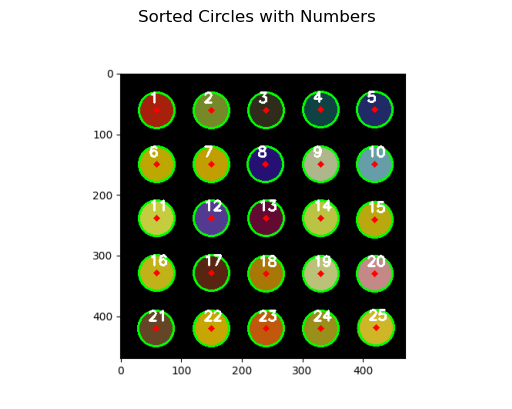

Dot 1: R=165.04, G=31.80, B=10.92
Dot 2: R=117.33, G=136.23, B=39.76
Dot 3: R=47.70, G=43.72, B=27.82
Dot 4: R=13.97, G=65.91, B=66.91
Dot 5: R=31.92, G=41.90, B=102.77
Dot 6: R=188.89, G=166.90, B=0.98
Dot 7: R=192.91, G=158.92, B=0.00
Dot 8: R=36.81, G=16.90, B=115.43
Dot 9: R=175.80, G=181.80, B=139.84
Dot 10: R=100.79, G=157.67, B=167.65
Dot 11: R=196.01, G=203.97, B=61.67
Dot 12: R=83.58, G=56.72, B=144.29
Dot 13: R=98.48, G=9.93, B=50.72
Dot 14: R=184.89, G=193.84, B=65.60
Dot 15: R=182.43, G=166.65, B=13.78
Dot 16: R=192.37, G=177.41, B=24.90
Dot 17: R=86.72, G=36.87, B=16.93
Dot 18: R=168.77, G=118.83, B=4.98
Dot 19: R=186.64, G=192.63, B=120.76
Dot 20: R=195.41, G=136.58, B=134.59
Dot 21: R=98.75, G=68.13, B=36.53
Dot 22: R=199.65, G=165.71, B=1.98
Dot 23: R=191.61, G=88.81, B=10.97
Dot 24: R=153.59, G=142.62, B=26.92
Dot 25: R=202.73, G=178.24, B=38.18


In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "10ppm.png"  
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale (required for HoughCircles)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a blur to reduce noise and improve circle detection
gray_blurred = cv2.medianBlur(gray, 5)

# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,  # Inverse ratio of resolution
    minDist=50,  # Minimum distance between circle centers
    param1=50,  # Upper threshold for the Canny edge detector
    param2=30,  # Threshold for center detection
    minRadius=20,  # Minimum circle radius
    maxRadius=24   # Maximum circle radius
)

# Ensure some circles were detected
if circles is not None:
    circles = np.uint16(np.around(circles))  # Round and convert to integer
    print(f"Detected {len(circles[0])} circles.")
    
    # Sort circles line by line (top-to-bottom, left-to-right)
    # Step 1: Sort by Y-coordinate (row-wise)
    sorted_circles = sorted(circles[0, :], key=lambda c: c[1])  # Sort by Y
    
    # Step 2: Group circles into rows
    row_tolerance = 20  # Adjust this for your grid spacing
    rows = []
    current_row = [sorted_circles[0]]  # Initialize with the first circle
    
    for circle in sorted_circles[1:]:
        if abs(circle[1] - current_row[-1][1]) <= row_tolerance:  # Same row
            current_row.append(circle)
        else:
            rows.append(sorted(current_row, key=lambda c: c[0]))  # Sort by X within row
            current_row = [circle]
    rows.append(sorted(current_row, key=lambda c: c[0]))  # Add the last row

    # Flatten the sorted rows back into a single list
    sorted_circles = [circle for row in rows for circle in row]

    # Display the sorted circles with numbering
    output_image = image_rgb.copy()
    for i, circle in enumerate(sorted_circles):
        x, y, r = circle
        # Draw the circle
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)  # Circle outline in green
        cv2.circle(output_image, (x, y), 2, (255, 0, 0), 3)  # Circle center in blue
        
        # Label the circle with its new number
        cv2.putText(
            output_image, 
            str(i + 1),  # Circle number
            (x - 10, y - 10),  # Position slightly above the center
            cv2.FONT_HERSHEY_SIMPLEX, 
            0.6,  # Font size
            (255, 255, 255),  # Text color (white)
            2  # Thickness
        )
    
    # Show the labeled image
    plt.imshow(output_image)
    plt.title("Sorted Circles with Numbers")
    plt.axis("off")
    plt.show()
    
    # Extract RGB values for each sorted circle
    rgb_values = []
    for i, circle in enumerate(sorted_circles):
        x, y, r = circle
        # Mask to extract only the circular region
        mask = np.zeros(image_rgb.shape[:2], dtype=np.uint8)
        cv2.circle(mask, (x, y), r, 255, -1)
        # Get the mean RGB value in the circular region
        mean_color = cv2.mean(image_rgb, mask=mask)[:3]
        rgb_values.append(mean_color)
        print(f"Dot {i+1}: R={mean_color[0]:.2f}, G={mean_color[1]:.2f}, B={mean_color[2]:.2f}")
else:
    print("No circles were detected.")


Detected 25 circles.


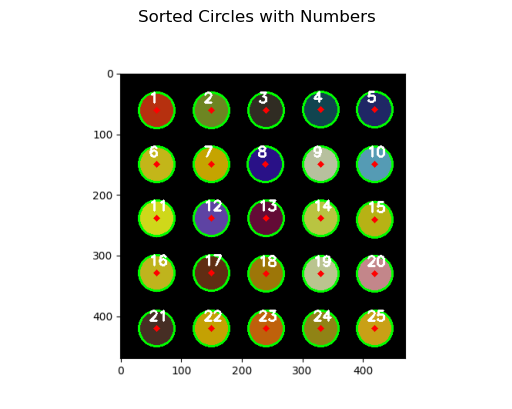

Dot 1: R=180.95, G=47.71, B=14.89
Dot 2: R=108.39, G=132.26, B=33.79
Dot 3: R=47.70, G=43.72, B=34.77
Dot 4: R=16.97, G=67.91, B=78.90
Dot 5: R=30.92, G=38.90, B=100.77
Dot 6: R=194.89, G=181.89, B=24.97
Dot 7: R=196.91, G=163.92, B=0.00
Dot 8: R=40.79, G=16.90, B=134.34
Dot 9: R=182.79, G=191.79, B=157.82
Dot 10: R=84.82, G=154.68, B=179.63
Dot 11: R=205.97, G=214.92, B=25.85
Dot 12: R=93.54, G=66.67, B=162.21
Dot 13: R=98.48, G=10.93, B=53.71
Dot 14: R=183.90, G=194.83, B=64.60
Dot 15: R=180.45, G=175.53, B=20.69
Dot 16: R=190.37, G=179.41, B=28.89
Dot 17: R=95.70, G=44.85, B=18.92
Dot 18: R=156.78, G=117.83, B=7.98
Dot 19: R=185.65, G=195.63, B=142.73
Dot 20: R=194.41, G=133.59, B=137.58
Dot 21: R=69.86, G=45.90, B=35.92
Dot 22: R=195.65, G=160.71, B=2.98
Dot 23: R=190.61, G=96.80, B=10.97
Dot 24: R=143.61, G=130.65, B=20.93
Dot 25: R=200.22, G=159.38, B=21.91


In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "initial.png"  
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale (required for HoughCircles)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a blur to reduce noise and improve circle detection
gray_blurred = cv2.medianBlur(gray, 5)

# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,  # Inverse ratio of resolution
    minDist=50,  # Minimum distance between circle centers
    param1=50,  # Upper threshold for the Canny edge detector
    param2=30,  # Threshold for center detection
    minRadius=20,  # Minimum circle radius
    maxRadius=24   # Maximum circle radius
)

# Ensure some circles were detected
if circles is not None:
    circles = np.uint16(np.around(circles))  # Round and convert to integer
    print(f"Detected {len(circles[0])} circles.")
    
    # Sort circles line by line (top-to-bottom, left-to-right)
    # Step 1: Sort by Y-coordinate (row-wise)
    sorted_circles = sorted(circles[0, :], key=lambda c: c[1])  # Sort by Y
    
    # Step 2: Group circles into rows
    row_tolerance = 20  # Adjust this for your grid spacing
    rows = []
    current_row = [sorted_circles[0]]  # Initialize with the first circle
    
    for circle in sorted_circles[1:]:
        if abs(circle[1] - current_row[-1][1]) <= row_tolerance:  # Same row
            current_row.append(circle)
        else:
            rows.append(sorted(current_row, key=lambda c: c[0]))  # Sort by X within row
            current_row = [circle]
    rows.append(sorted(current_row, key=lambda c: c[0]))  # Add the last row

    # Flatten the sorted rows back into a single list
    sorted_circles = [circle for row in rows for circle in row]

    # Display the sorted circles with numbering
    output_image = image_rgb.copy()
    for i, circle in enumerate(sorted_circles):
        x, y, r = circle
        # Draw the circle
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)  # Circle outline in green
        cv2.circle(output_image, (x, y), 2, (255, 0, 0), 3)  # Circle center in blue
        
        # Label the circle with its new number
        cv2.putText(
            output_image, 
            str(i + 1),  # Circle number
            (x - 10, y - 10),  # Position slightly above the center
            cv2.FONT_HERSHEY_SIMPLEX, 
            0.6,  # Font size
            (255, 255, 255),  # Text color (white)
            2  # Thickness
        )
    
    # Show the labeled image
    plt.imshow(output_image)
    plt.title("Sorted Circles with Numbers")
    plt.axis("off")
    plt.show()
    
    # Extract RGB values for each sorted circle
    rgb_values = []
    for i, circle in enumerate(sorted_circles):
        x, y, r = circle
        # Mask to extract only the circular region
        mask = np.zeros(image_rgb.shape[:2], dtype=np.uint8)
        cv2.circle(mask, (x, y), r, 255, -1)
        # Get the mean RGB value in the circular region
        mean_color = cv2.mean(image_rgb, mask=mask)[:3]
        rgb_values.append(mean_color)
        print(f"Dot {i+1}: R={mean_color[0]:.2f}, G={mean_color[1]:.2f}, B={mean_color[2]:.2f}")
else:
    print("No circles were detected.")
